# NBA Analysis

Standard imports

In [1]:
import pandas as pd
import numpy as np
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import leaguedashplayerbiostats

from sklearn import linear_model
import seaborn as sns 


### Finding all active players, their height in inches, and points for the 2020-2021 Season

In [2]:
playerbiostats = leaguedashplayerbiostats.LeagueDashPlayerBioStats()
playerbiostats.get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
0,203932,Aaron Gordon,1610612743,DEN,25.0,6-8,80,235,Arizona,USA,...,50,618,284,161,2.1,0.055,0.150,0.204,0.547,0.165
1,1628988,Aaron Holiday,1610612754,IND,24.0,6-0,72,185,UCLA,USA,...,66,475,89,123,-0.2,0.012,0.060,0.189,0.503,0.139
2,1630174,Aaron Nesmith,1610612738,BOS,21.0,6-5,77,215,Vanderbilt,USA,...,46,218,127,23,-0.5,0.041,0.146,0.133,0.573,0.047
3,1627846,Abdel Nader,1610612756,PHX,27.0,6-5,77,225,Iowa State,Egypt,...,24,160,62,19,5.0,0.020,0.151,0.183,0.605,0.078
4,1629690,Adam Mokoka,1610612741,CHI,22.0,6-4,76,190,None,France,...,14,15,5,5,-7.1,0.017,0.077,0.171,0.386,0.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1627812,Yogi Ferrell,1610612746,LAC,28.0,6-0,72,178,Indiana,USA,...,10,56,19,22,-0.4,0.034,0.095,0.193,0.459,0.229
536,1629139,Yuta Watanabe,1610612761,TOR,26.0,6-9,81,215,George Washington,Japan,...,50,218,159,40,-2.7,0.046,0.171,0.121,0.565,0.079
537,203897,Zach LaVine,1610612741,CHI,26.0,6-5,77,200,UCLA,USA,...,58,1591,289,282,-0.8,0.018,0.121,0.302,0.634,0.225
538,1630192,Zeke Nnaji,1610612743,DEN,20.0,6-9,81,240,Arizona,USA,...,42,136,65,10,-10.5,0.034,0.129,0.126,0.615,0.037


Let's run some standard statistics on height, weight, and points

average height = 78.31296296296296 inches
max height = 89 inches
min height = 69 inches


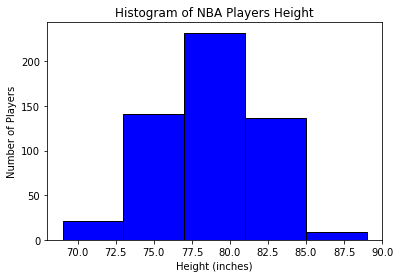

In [3]:
height = playerbiostats.get_data_frames()[0]["PLAYER_HEIGHT_INCHES"]

# matplotlib histogram
plt.hist(height, color = 'blue', edgecolor = 'black',
         bins = 5)

# Add labels
plt.title('Histogram of NBA Players Height')
plt.xlabel('Height (inches)')
plt.ylabel('Number of Players')

print('average height = ' + str(np.mean(height)) + ' inches')
print('max height = ' + str(np.max(height)) + ' inches')
print('min height = ' + str(np.min(height)) + ' inches')

average weight = 217.0 pounds
max weight = 311 pounds
min weight = 160 pounds


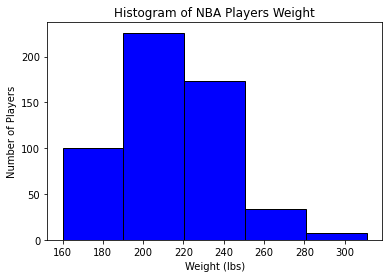

In [4]:
weight = playerbiostats.get_data_frames()[0]["PLAYER_WEIGHT"]

# weight is stored as str? convert to int
weight = pd.to_numeric(weight, errors='coerce')

# matplotlib histogram
plt.hist(weight, color = 'blue', edgecolor = 'black',
         bins = 5)

# Add labels
plt.title('Histogram of NBA Players Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Number of Players')

print('average weight = ' + str(round(np.mean(weight),0)) + ' pounds')
print('max weight = ' + str(np.max(weight)) + ' pounds')
print('min weight = ' + str(np.min(weight)) + ' pounds')

Text(0, 0.5, 'Number of Players')

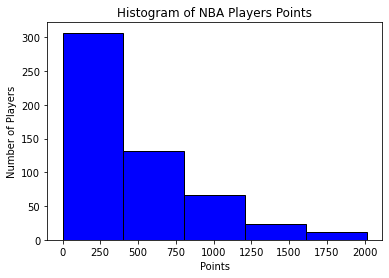

In [5]:
points = playerbiostats.get_data_frames()[0]["PTS"]
# matplotlib histogram
plt.hist(points, color = 'blue', edgecolor = 'black',
         bins = 5)

# Add labels
plt.title('Histogram of NBA Players Points')
plt.xlabel('Points')
plt.ylabel('Number of Players')

Unsurprisingly, height is normally distributed and weight is left skew-distributed.
Points however is highly left skew.

### Graph the relationship between Height and Points Scored

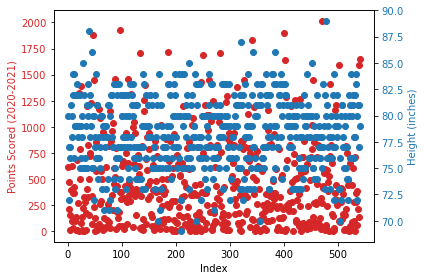

In [6]:
# Create some mock data
index = np.arange(1, 541, 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Points Scored (2020-2021)', color=color)
ax1.scatter(index, points, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Height (inches)', color=color)  # we already handled the x-label with ax1
ax2.scatter(index, height, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Well this isn't useful. Lets try to sort the data by height and points ascending and graph again

In [7]:
bio_stats_sorted = playerbiostats.get_data_frames()[0].sort_values(by=['PLAYER_HEIGHT_INCHES', 'PTS'])

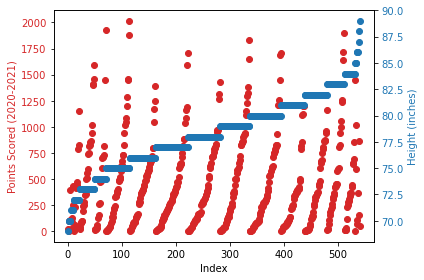

In [8]:
height = bio_stats_sorted["PLAYER_HEIGHT_INCHES"]
points = bio_stats_sorted["PTS"]
average_points = bio_stats_sorted["PTS"].mean()

index = np.arange(1, 541, 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Points Scored (2020-2021)', color=color)
ax1.scatter(index, points, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Height (inches)', color=color)
ax2.scatter(index, height, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()

The majority of players are scoring less than 700 points in the 2020-2021 season. However there are more players scoring higher than 700 points in the lower height category

Still believe that height is a factor in a players ability to score points? Let's run a simple regression model.

In [9]:
data = endpoints.leagueleaders.LeagueLeaders() 

df_linear_model = data.league_leaders.get_data_frame()

df_linear_model = pd.merge(df_linear_model, playerbiostats.get_data_frames()[0], how='left', left_on='PLAYER', right_on='PLAYER_NAME')

df_linear_model.head()

,PLAYER_ID_x,RANK,PLAYER,TEAM,GP_x,MIN,FGM,FGA,FG_PCT,FG3M,...,GP_y,PTS_y,REB_y,AST_y,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
0,201939,1,Stephen Curry,GSW,63,2152,658,1365,0.482,337,...,63,2015,345,363,4.6,0.013,0.135,0.331,0.655,0.283
1,203081,2,Damian Lillard,POR,67,2398,602,1334,0.451,275,...,67,1928,283,505,4.0,0.012,0.104,0.306,0.623,0.334
2,203999,3,Nikola Jokic,DEN,72,2488,732,1293,0.566,92,...,72,1898,780,599,7.7,0.087,0.237,0.293,0.647,0.377
3,203078,4,Bradley Beal,WAS,60,2147,670,1382,0.485,130,...,60,1878,283,265,-0.4,0.033,0.094,0.331,0.593,0.202
4,1629029,5,Luka Doncic,DAL,66,2262,647,1351,0.479,192,...,66,1830,527,567,3.9,0.024,0.202,0.350,0.587,0.425


In [10]:
# this is a quick example using FGA vs. Points
def linRegModel(x, y):
   
    # create an object that contains the linear model class
    model = linear_model.LinearRegression()    
    
    # fit x and y
    model.fit(x,y)                             

    # Get our r2 value and round it to 2 decimals. How much variance is exaplained?
    # Get our predicted y values for x
    r2 = round(model.score(x,y), 2)            
    predicted_y = model.predict(x)  
    
    return predicted_y, r2

In [11]:
# We divide each variable by games played (GP) to get per game average
x_fga, y_pts = df_linear_model.FGA/df_linear_model.GP_x, df_linear_model.PTS_x/df_linear_model.GP_x 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
x_fga = np.array(x_fga).reshape(-1,1)     
y_pts = np.array(y_pts).reshape(-1,1) 

predicted_y_pts, r2 = linRegModel(x_fga, y_pts)

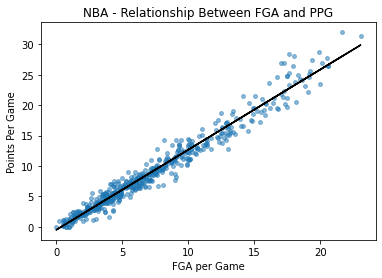

In [12]:
# plot

plt.scatter(x_fga, y_pts, s=15, alpha=.5)                            
plt.plot(x_fga, predicted_y_pts, color = 'black')     
plt.title('NBA - Relationship Between FGA and PPG')          
plt.xlabel('FGA per Game')                                   
plt.ylabel('Points Per Game')  

plt.savefig('fga vs ppg.png')

The above graph and linear regression tells us that naturally the more field goal attempts a player makes in a game, the more points per game they achieve. Now let's try with height

In [13]:
# reshape height
x_height = np.array(df_linear_model.PLAYER_HEIGHT_INCHES).reshape(-1,1)     

predicted_y_pts_wHeight, r2_height = linRegModel(x_height, y_pts)

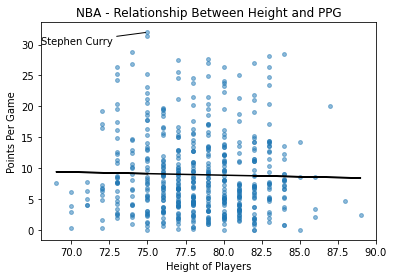

In [14]:
# plot

plt.scatter(x_height, y_pts, s=15, alpha=.5)                            
plt.plot(x_height, predicted_y_pts_wHeight, color = 'black')     
plt.title('NBA - Relationship Between Height and PPG')          
plt.xlabel('Height of Players')                                   
plt.ylabel('Points Per Game')  

plt.annotate(df_linear_model.PLAYER[0],                       
             (x_height[0], y_pts[0]),                         
             (x_height[0]-7,y_pts[0]-2),                    
             arrowprops=dict(arrowstyle='-'))    

plt.savefig('height vs ppg.png')

It looks like there isn't a particular relationship between PPG and height. Let's run the model with height vs. rebounds and height vs. blocks

In [15]:
# define stats into per game
rebounds = df_linear_model.REB_x/df_linear_model.GP_x
blocks = df_linear_model.BLK/df_linear_model.GP_x

#resize
y_rebounds = np.array(rebounds).reshape(-1,1)     
y_blocks = np.array(blocks).reshape(-1,1)     

predicted_y_rebounds, r2 = linRegModel(x_height, y_rebounds)
predicted_y_blocks, r2 = linRegModel(x_height, y_blocks)

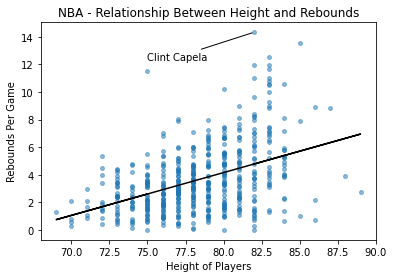

In [16]:
# plot height vs rebounds

plt.scatter(x_height, y_rebounds, s=15, alpha=.5)                            
plt.plot(x_height, predicted_y_rebounds, color = 'black')     
plt.title('NBA - Relationship Between Height and Rebounds')          
plt.xlabel('Height of Players')                                   
plt.ylabel('Rebounds Per Game') 

plt.annotate(df_linear_model.PLAYER[60],                       
             (x_height[60], y_rebounds[60]),                         
             (x_height[60]-7,y_rebounds[60]-2),                    
             arrowprops=dict(arrowstyle='-'))

plt.savefig('height vs rebounds.png')

### As height increases, the rebounds per game increases in conjuction.
Let's try with height vs blocks per game now

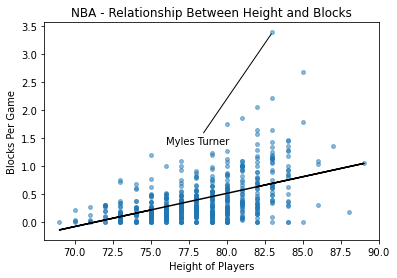

In [17]:
# plot height vs blocks

plt.scatter(x_height, y_blocks, s=15, alpha=.5)                            
plt.plot(x_height, predicted_y_blocks, color = 'black')     
plt.title('NBA - Relationship Between Height and Blocks')          
plt.xlabel('Height of Players')                                   
plt.ylabel('Blocks Per Game') 

plt.annotate(df_linear_model.PLAYER[167],                       
             (x_height[167], y_blocks[167]),                         
             (x_height[167]-7,y_blocks[167]-2),                    
             arrowprops=dict(arrowstyle='-'))    

plt.savefig('height vs blocks.png')

As height increases, the Blocks per game increases in conjuction.